In [1]:
#!/usr/bin/env python

import numpy as np
import MDAnalysis
import matplotlib.pyplot as plt
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import pandas as pd
import subprocess, os, StringIO, re, datetime, time, sys
import optparse
from MDAnalysis.analysis.rdf import InterRDF
from matplotlib import pyplot
import pylab
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd



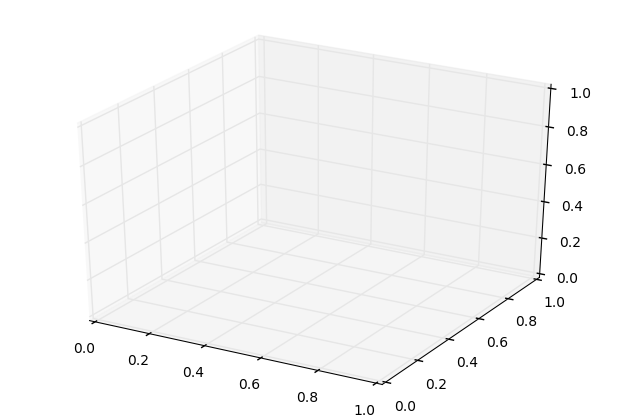

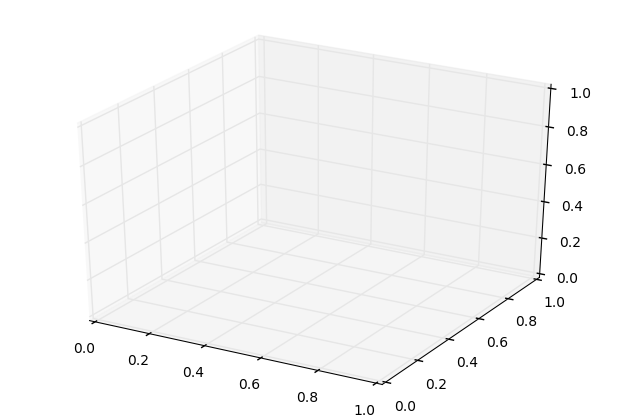

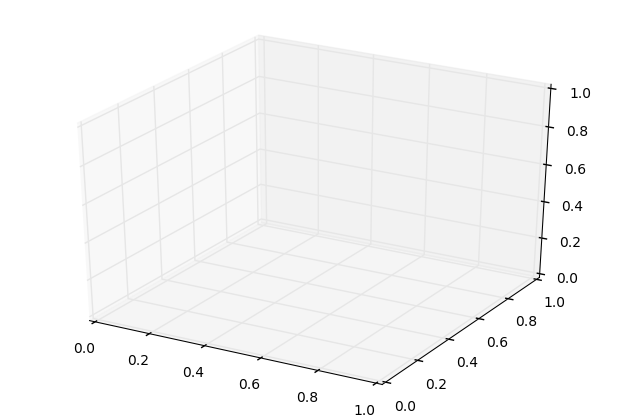

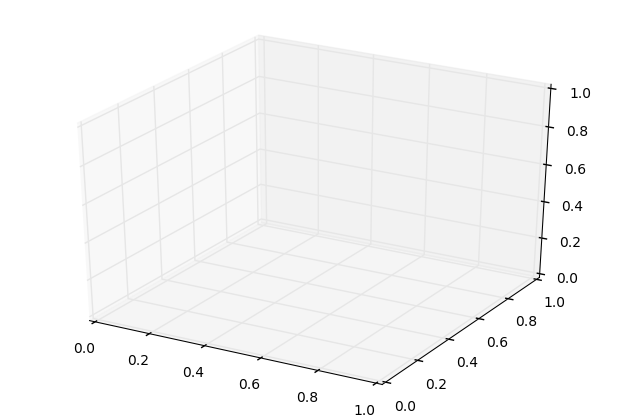

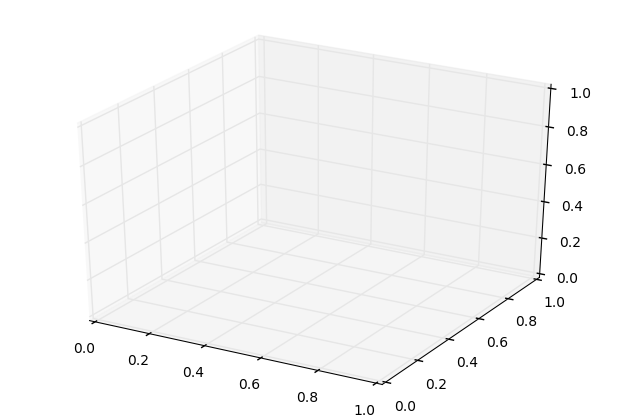

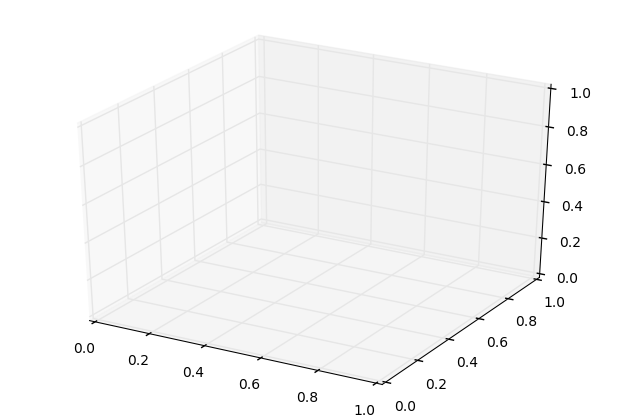

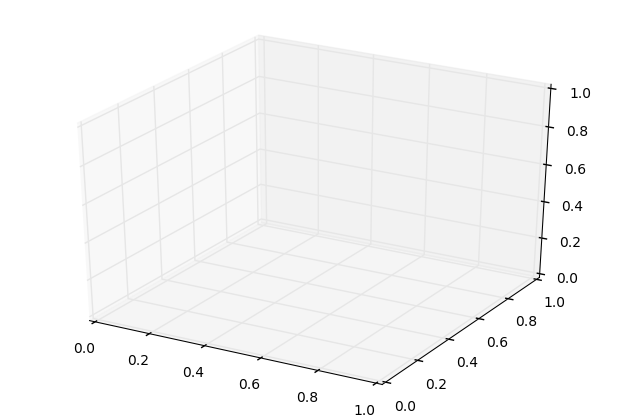

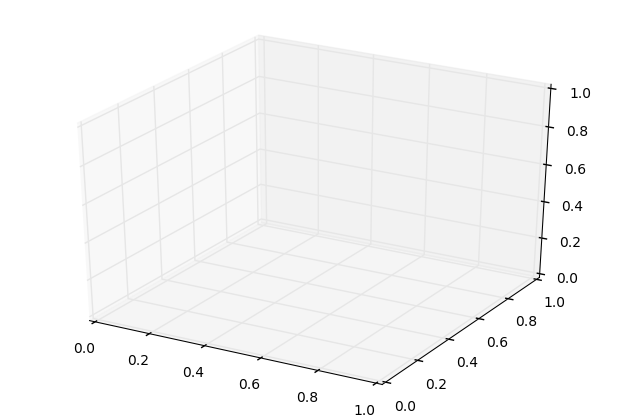

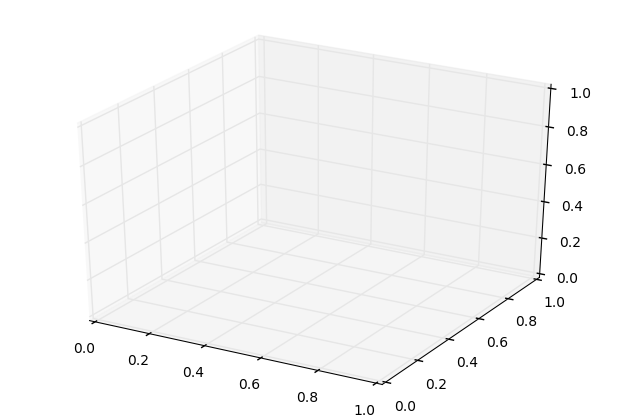

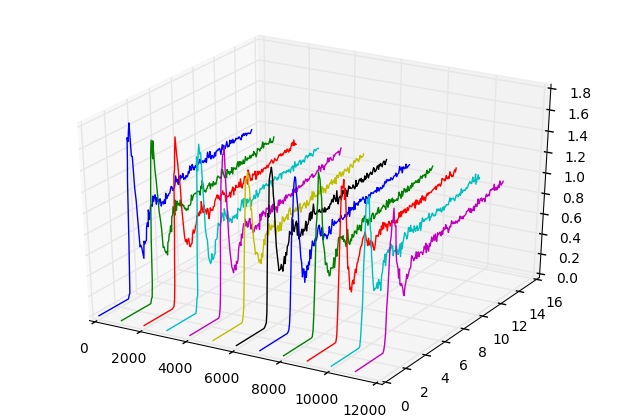

In [15]:

fig = pylab.figure()
ax = Axes3D(fig)

u = MDAnalysis.Universe("/home/shuzhe/Simulations/22week/11.MB1x5_solv_with_buffer/Output/npt.gro", "/home/shuzhe/Simulations/22week/11.MB1x5_solv_with_buffer/Output/centered.xtc")

step = 1000
average = 100
water = u.select_atoms("resname SOL and name OW")
polymer = u.select_atoms("resname MB1 and name CN")
water, polymer
time,bins,rdf = [], [] ,[]
for i in range(0, u.trajectory.n_frames, step):
    #print i
    tmp = InterRDF(polymer, water, start = i, stop = i + average, nbins = 200)
    tmp.run()
    bins.append(list(tmp.bins))
    rdf.append((tmp.rdf))
    time.append([i] * len(tmp.rdf))
    

for i in range(len(time)):
    ax.plot(time[i], bins[i], rdf[i])
pyplot.show()
#pyplot.close()


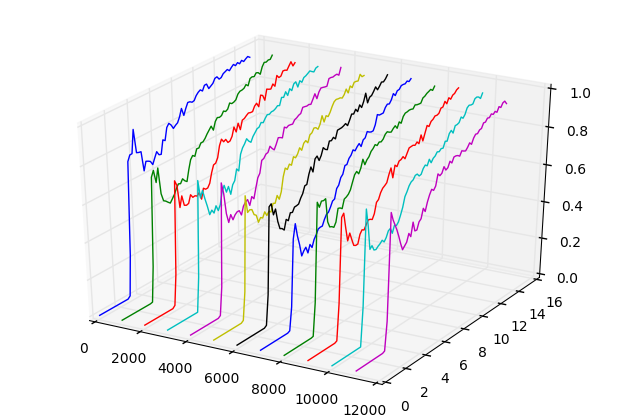

In [6]:

fig = pylab.figure()
ax = Axes3D(fig)

u = MDAnalysis.Universe("/home/shuzhe/Simulations/22week/10.MB0x5_solv_with_buffer/Output/npt.gro", "/home/shuzhe/Simulations/22week/10.MB0x5_solv_with_buffer/Output/centered.xtc")

step = 1000
average = 100
water = u.select_atoms("resname SOL and name OW")
polymer = u.select_atoms("resname MB0 and name CN")
water, polymer
time,bins,rdf = [], [] ,[]
for i in range(0, u.trajectory.n_frames, step):
    #print i
    tmp = InterRDF(polymer, water, start = i, stop = i + average)
    tmp.run()
    bins.append(list(tmp.bins))
    rdf.append((tmp.rdf))
    time.append([i] * len(tmp.rdf))

for i in range(len(time)):
    ax.plot(time[i], bins[i], rdf[i])
pyplot.show()
#pyplot.close()

In [3]:
fig = pylab.figure()
ax = Axes3D(fig)

u = MDAnalysis.Universe("/home/shuzhe/Simulations/22week/11.MB1x5_solv_with_buffer/Output/npt.gro", "/home/shuzhe/Simulations/22week/11.MB1x5_solv_with_buffer/Output/centered.xtc")

# step = 1000
# average = 100
# water = u.select_atoms("resname NA")
# polymer = u.select_atoms("resname MB1 and name CN")
# water, polymer
# time,bins,rdf = [], [] ,[]
# for i in range(0, u.trajectory.n_frames, step):
#     #print i
#     tmp = InterRDF(polymer, water, start = i, stop = i + average)
#     tmp.run()
#     bins.append(list(tmp.bins))
#     rdf.append((tmp.rdf))
#     time.append([i] * len(tmp.rdf))
    
# # 
# ax.set_zlim3d(10)
# for i in range(len(time)):
#     ax.plot(time[i], bins[i], rdf[i] )
# # ax.plot(bins[-1], rdf[-1])
# # pyplot.plot(bin[-1], rdf[-1])
# pyplot.show()
# pyplot.show()
#pyplot.close()



step = 3000
average = 3000
water = u.select_atoms("resname SOL and name OW")
polymer = u.select_atoms("resname MB1 and name CN")
water, polymer
time,bins,rdf = [], [] ,[]
for i in range(0, u.trajectory.n_frames, step):
    #print i
    tmp = InterRDF(polymer, water, start = i, stop = i + average, nbins = 200)
    tmp.run()
    bins += list(tmp.bins)
    rdf += list(tmp.rdf)
    time+= [i] * len(tmp.rdf)

#for i in range(len(time)):
 #   ax.plot(time[i], bins[i], rdf[i])
#pyplot.show()
#pyplot.close()


df = pd.DataFrame({
        "time" :time, 
        "distance" : bins,
        "rdf" :rdf})

df.to_csv("/home/shuzhe/Simulations/22week/11.MB1x5_solv_with_buffer/Output/rdf_water.csv")

In [ ]:
fig = pylab.figure()
ax = Axes3D(fig)

u = MDAnalysis.Universe("/home/shuzhe/Simulations/22week/11.MB1x5_solv_with_buffer/Output/npt.gro", "/home/shuzhe/Simulations/22week/11.MB1x5_solv_with_buffer/Output/centered.xtc")

step = 3000
average = 3000
water = u.select_atoms("resname CL")
polymer = u.select_atoms("resname MB1 and name CN")
water, polymer
time,bins,rdf = [], [] ,[]
for i in range(0, u.trajectory.n_frames, step):
    #print i
    tmp = InterRDF(polymer, water, start = i, stop = i + average, nbins = 200)
    tmp.run()
    bins += list(tmp.bins)
    rdf += list(tmp.rdf)
    time+= [i] * len(tmp.rdf)



df = pd.DataFrame({
        "time" :time, 
        "distance" : bins,
        "rdf" :rdf})

df.to_csv("/home/shuzhe/Simulations/22week/11.MB1x5_solv_with_buffer/Output/rdf_CL.csv")

In [4]:

fig = pylab.figure()
ax = Axes3D(fig)

u = MDAnalysis.Universe("/home/shuzhe/Simulations/22week/10.MB0x5_solv_with_buffer/Output/npt.gro", "/home/shuzhe/Simulations/22week/10.MB0x5_solv_with_buffer/Output/centered.xtc")

step = 3000
average = 3000
water = u.select_atoms("resname SOL and name OW")
polymer = u.select_atoms("resname MB0 and name CN")
water, polymer
time,bins,rdf = [], [] ,[]
for i in range(0, u.trajectory.n_frames, step):
    #print i
    tmp = InterRDF(polymer, water, start = i, stop = i + average, nbins = 200)
    tmp.run()
    bins += list(tmp.bins)
    rdf += list(tmp.rdf)
    time+= [i] * len(tmp.rdf)

#for i in range(len(time)):
 #   ax.plot(time[i], bins[i], rdf[i])
#pyplot.show()
#pyplot.close()


df = pd.DataFrame({
        "time" :time, 
        "distance" : bins,
        "rdf" :rdf})

df.to_csv("/home/shuzhe/Simulations/22week/10.MB0x5_solv_with_buffer/Output/rdf_water.csv")

In [ ]:
bins

In [5]:

fig = pylab.figure()
ax = Axes3D(fig)

u = MDAnalysis.Universe("/home/shuzhe/Simulations/22week/9.MA1x5_solv_with_buffer/Output/npt.gro", "/home/shuzhe/Simulations/22week/9.MA1x5_solv_with_buffer/Output/centered.xtc")

# step = 1000
# average = 100
# water = u.select_atoms("resname NA")
# polymer = u.select_atoms("resname MA1 and name CO")
# water, polymer
# time,bins,rdf = [], [] ,[]
# for i in range(0, u.trajectory.n_frames, step):
#     #print i
#     tmp = InterRDF(polymer, water, start = i, stop = i + average, nbins = 200)
#     tmp.run()
#     bins.append(list(tmp.bins))
#     rdf.append((tmp.rdf))
#     time.append([i] * len(tmp.rdf))

# for i in range(len(time)):
#     ax.plot(time[i], bins[i], rdf[i])
# pyplot.show()
#pyplot.close()


step = 3000
average = 3000
water = u.select_atoms("resname SOL and name OW")
polymer = u.select_atoms("resname MA1 and name CO")
water, polymer
time,bins,rdf = [], [] ,[]
for i in range(0, u.trajectory.n_frames, step):
    #print i
    tmp = InterRDF(polymer, water, start = i, stop = i + average, nbins = 200)
    tmp.run()
    bins += list(tmp.bins)
    rdf += list(tmp.rdf)
    time+= [i] * len(tmp.rdf)

#for i in range(len(time)):
 #   ax.plot(time[i], bins[i], rdf[i])
#pyplot.show()
#pyplot.close()


df = pd.DataFrame({
        "time" :time, 
        "distance" : bins,
        "rdf" :rdf})

df.to_csv("/home/shuzhe/Simulations/22week/9.MA1x5_solv_with_buffer/Output/rdf_water.csv")


In [4]:

fig = pylab.figure()
ax = Axes3D(fig)

u = MDAnalysis.Universe("/home/shuzhe/Simulations/22week/9.MA1x5_solv_with_buffer/Output/npt.gro", "/home/shuzhe/Simulations/22week/9.MA1x5_solv_with_buffer/Output/centered.xtc")

step = 1000
average = 100
water = u.select_atoms("resname CL")
polymer = u.select_atoms("resname MA1 and name CO")
water, polymer
time,bins,rdf = [], [] ,[]
for i in range(0, u.trajectory.n_frames, step):
    #print i
    tmp = InterRDF(polymer, water, start = i, stop = i + average, nbins = 200)
    tmp.run()
    bins.append(list(tmp.bins))
    rdf.append((tmp.rdf))
    time.append([i] * len(tmp.rdf))




df = pd.DataFrame({
        "time" :time, 
        "distance" : bins,
        "rdf" :rdf})

df.to_csv("/home/shuzhe/Simulations/22week/9.MA1x5_solv_with_buffer/Output/rdf_CL.csv")


In [6]:

fig = pylab.figure()
ax = Axes3D(fig)

u = MDAnalysis.Universe("/home/shuzhe/Simulations/22week/8.MA0x5_solv_with_buffer/Output/npt.gro", "/home/shuzhe/Simulations/22week/8.MA0x5_solv_with_buffer/Output/centered.xtc")

# step = 1000
# average = 100
# water = u.select_atoms("resname NA")
# polymer = u.select_atoms("resname MA0 and name CO")
# water, polymer
# time,bins,rdf = [], [] ,[]
# for i in range(0, u.trajectory.n_frames, step):
#     #print i
#     tmp = InterRDF(polymer, water, start = i, stop = i + average)
#     tmp.run()
#     bins.append(list(tmp.bins))
#     rdf.append((tmp.rdf))
#     time.append([i] * len(tmp.rdf))

# for i in range(len(time)):
#     ax.plot(time[i], bins[i], rdf[i])
# pyplot.show()
#pyplot.close()
step = 3000
average = 3000
water = u.select_atoms("resname SOL and name OW")
polymer = u.select_atoms("resname MA0 and name CO")
water, polymer
time,bins,rdf = [], [] ,[]
for i in range(0, u.trajectory.n_frames, step):
    #print i
    tmp = InterRDF(polymer, water, start = i, stop = i + average, nbins = 200)
    tmp.run()
    bins += list(tmp.bins)
    rdf += list(tmp.rdf)
    time+= [i] * len(tmp.rdf)

#for i in range(len(time)):
 #   ax.plot(time[i], bins[i], rdf[i])
#pyplot.show()
#pyplot.close()


df = pd.DataFrame({
        "time" :time, 
        "distance" : bins,
        "rdf" :rdf})

df.to_csv("/home/shuzhe/Simulations/22week/8.MA0x5_solv_with_buffer/Output/rdf_water.csv")



In [3]:

fig = pylab.figure()
ax = Axes3D(fig)

u = MDAnalysis.Universe("/home/shuzhe/Simulations/22week/8.MA0x5_solv_with_buffer/Output/npt.gro", "/home/shuzhe/Simulations/22week/8.MA0x5_solv_with_buffer/Output/centered.xtc")

step = 1000
average = 100
water = u.select_atoms("resname CL")
polymer = u.select_atoms("resname MA0 and name CO")
water, polymer
time,bins,rdf = [], [] ,[]
for i in range(0, u.trajectory.n_frames, step):
    #print i
    tmp = InterRDF(polymer, water, start = i, stop = i + average)
    tmp.run()
    bins.append(list(tmp.bins))
    rdf.append((tmp.rdf))
    time.append([i] * len(tmp.rdf))


df = pd.DataFrame({
        "time" :time, 
        "distance" : bins,
        "rdf" :rdf})

df.to_csv("/home/shuzhe/Simulations/22week/8.MA0x5_solv_with_buffer/Output/rdf_CL.csv")



In [ ]:

fig = pylab.figure()
ax = Axes3D(fig)

u = MDAnalysis.Universe("/home/shuzhe/Simulations/22week/8.MA0x5_solv_with_buffer/Output/npt.gro", "/home/shuzhe/Simulations/22week/8.MA0x5_solv_with_buffer/Output/centered.xtc")

# step = 1000
# average = 100
# water = u.select_atoms("resname NA")
# polymer = u.select_atoms("resname MA0 and name CO")
# water, polymer
# time,bins,rdf = [], [] ,[]
# for i in range(0, u.trajectory.n_frames, step):
#     #print i
#     tmp = InterRDF(polymer, water, start = i, stop = i + average)
#     tmp.run()
#     bins.append(list(tmp.bins))
#     rdf.append((tmp.rdf))
#     time.append([i] * len(tmp.rdf))

# for i in range(len(time)):
#     ax.plot(time[i], bins[i], rdf[i])
# pyplot.show()
#pyplot.close()
step = 3000
average = 3000
water = u.select_atoms("resname SOL and name OW")
polymer = u.select_atoms("resname MA0 and name CO")
water, polymer
time,bins,rdf = [], [] ,[]
for i in range(0, u.trajectory.n_frames, step):
    #print i
    tmp = InterRDF(polymer, water, start = i, stop = i + average, nbins = 200)
    tmp.run()
    bins += list(tmp.bins)
    rdf += list(tmp.rdf)
    time+= [i] * len(tmp.rdf)

#for i in range(len(time)):
 #   ax.plot(time[i], bins[i], rdf[i])
#pyplot.show()
#pyplot.close()


df = pd.DataFrame({
        "time" :time, 
        "distance" : bins,
        "rdf" :rdf})

df.to_csv("/home/shuzhe/Simulations/22week/8.MA0x5_solv_with_buffer/Output/rdf_water.csv")



In [2]:

fig = pylab.figure()
ax = Axes3D(fig)

u = MDAnalysis.Universe("/home/shuzhe/Simulations/22week/8.MA0x5_solv_with_buffer/Output/npt.gro", "/home/shuzhe/Simulations/22week/8.MA0x5_solv_with_buffer/Output/centered.xtc")

step = 1000
average = 100
water = u.select_atoms("resname CL")
polymer = u.select_atoms("resname MA0 and name CO")
water, polymer
time,bins,rdf = [], [] ,[]
for i in range(0, u.trajectory.n_frames, step):
    #print i
    tmp = InterRDF(polymer, water, start = i, stop = i + average)
    tmp.run()
    bins.append(list(tmp.bins))
    rdf.append((tmp.rdf))
    time.append([i] * len(tmp.rdf))



df = pd.DataFrame({
        "time" :time, 
        "distance" : bins,
        "rdf" :rdf})

df.to_csv("/home/shuzhe/Simulations/22week/8.MA0x5_solv_with_buffer/Output/rdf_CL.csv")

